# Filming in the City of Big Shoulders: An Interactive Visualization of Where Films are Being Made Throughout Chicago

## By David Marcus

Everyone knows that many scenes of movies, television shows, and streaming shows are filmed throughout Chicago, one of America's most beautiful and iconic cities. Yet because so much filming occurs throughout Chicago, it is difficult to visualize which parts of the city are on camera most often, as well as how this trend changes from year to year. To convey where filming occurred throughout Chicago in a given year, I grabbed data on filming permits from the Chicago Department of Transportation (https://data.cityofchicago.org/Community-Economic-Development/Filming-Permits-Transportation-Department/c2az-nhru) via the Chicago Data Portal and built an interactive visualization. The visualization allows you to explore film permit locations throughout Chicago by year and see for yourself how filming locations have changed throughout Chicago! To skip to my final visualization, scroll down to the final visualization on this page. Otherwise, if you want more context or want to see how I went about creating the visualization, keep reading.

In [4]:
# Import libraries.
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets
import matplotlib.dates as mdates
import datetime
import bqplot

In [5]:
# Import data.
fp = pd.read_csv("fp.csv")
#fp = fp[1:10000]

Before I began plotting where scenes were being filmed throughout Chicago, I explored the dataset and tried to identify some trends within it. I had a hunch that filming had been increasing throughout the city, so I whipped up a quick visualization of the total number film applications the Chicago Department of Transportation received in a given year. The results indicated by the visualization were surprising: there had been a dramatic increase in the number of film applications. Additionally, the visualization indicated a massive plummet in the amount of filming in the year 2019. Wanting to learn more, I decided to investigate further by building a second visualization.

Text(0.5, 1.0, 'Filming Applications Received by the Chicago Department of Transportation as a Function of Year')

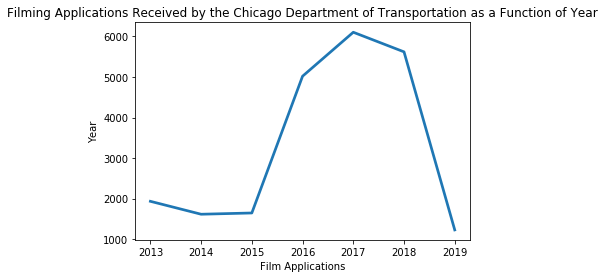

In [6]:
# Viz of permits by year.
fp['APPLICATIONSTARTDATE'] = pd.to_datetime(fp['APPLICATIONSTARTDATE'])
fp['YEAR_APP_START'] = fp['APPLICATIONSTARTDATE'].dt.year
fp_yr = fp.groupby('YEAR_APP_START')['YEAR_APP_START'].count()
fp_yr = fp_yr[:-1]
plt.plot(fp_yr, linewidth=2.7)
plt.xlabel('Film Applications')
plt. ylabel('Year')
plt.title('Filming Applications Received by the Chicago Department of Transportation as a Function of Year')

In addition to explaining the extreme drop in film applications in 2019, I wanted my second visualization to show each year's worth of filming on the same plot, as well as illustrate how filming in a given year breaks down by month. Subsequently, I built the visualization you see below. Similarly to the previous visualization, the visualization below indicates that much more filming occurred in 2016-2018 than 2013-2015. However, unlike the previous visualization, the visualization below indicates the reason for the plummet in 2019 film applications: the data was gathered in mid 2019 and remains incomplete for that year. As 2019 progresses, the data will update and become more complete, but for now the data pertaining to 2019 remains imperfect, though it does seem like 2019 is shaping up to have fewer film applications than previous years. Though the month-by-month insights derived from the visualization below did not find their way into the final visualization, they were useful for understanding the trends within each year's worth of data.

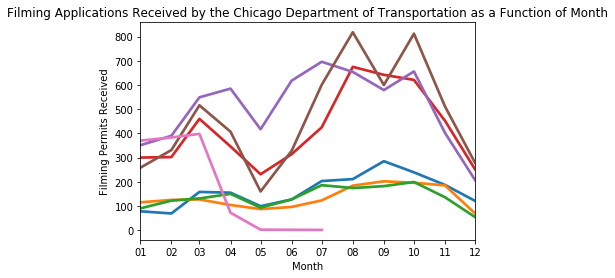

In [7]:
# Viz of permits by month.

fp['APPLICATIONSTARTDATE'] = pd.to_datetime(fp['APPLICATIONSTARTDATE'])
fp['YEAR_APP_START'] = fp['APPLICATIONSTARTDATE'].dt.year
fp['MONTH_APP_START'] = fp['APPLICATIONSTARTDATE'].dt.month
fp['MONTH_APP_START'] = pd.to_datetime(fp['MONTH_APP_START'], format='%m')#.dt.month_name()#.str.slice(stop=3)
fp['MONTH_APP_START']
fp_mo_2 = fp.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fp1 = fp[fp['YEAR_APP_START'] == 2013]
fp1 = fp1.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fp2 = fp[fp['YEAR_APP_START'] == 2014]
fp2 = fp2.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fp3 = fp[fp['YEAR_APP_START'] == 2015]
fp3 = fp3.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fp4 = fp[fp['YEAR_APP_START'] == 2016]
fp4 = fp4.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fp5 = fp[fp['YEAR_APP_START'] == 2017]
fp5 = fp5.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fp6 = fp[fp['YEAR_APP_START'] == 2018]
fp6 = fp6.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fp7 = fp[fp['YEAR_APP_START'] == 2019]
fp7 = fp7.groupby('MONTH_APP_START')['MONTH_APP_START'].count()
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(fp1, linewidth=2.7)
plt.plot(fp2, linewidth=2.7)
plt.plot(fp3, linewidth=2.7)
plt.plot(fp4, linewidth=2.7)
plt.plot(fp5, linewidth=2.7)
plt.plot(fp6, linewidth=2.7)
plt.plot(fp7, linewidth=2.7)
plt.title('Filming Applications Received by the Chicago Department of Transportation as a Function of Month')
plt.xlabel('Month')
plt.ylabel('Filming Permits Received')
ax.set_xlim(datetime.date(1900, 1, 1), datetime.date(1900,12,1))
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m'))

After exploring the nuances of the data, I constructed the interactive visualization you'll find below. By plotting the geographic locations of each film permit, the visualization helps solve our original problem: figuring out which parts of the city are on camera most often. Each dot you see on the visualization corresponds to an application received by the Chicago Department of Transportation to film at the geographic location on which the dot is placed. The dots displayed on the visualization are filtered by the year selected. In other words, the visualization only plots applications received in the selected year--2013 by default, but you can change that! (The year is indicated to the right of the slider, above the visualization). This visualization is interactive, meaning you can select what year the dots are filtered by. Selecting a year between 2013 and 2019 is as straightforward as holding down the slider button and dragging it to the right or left to select a different year. Using the slider, you can get a sense of where scenes are being filmed throughout Chicago, and compare filming locations by year and volume from one year to the next.

In [8]:
# Build dashboard & visualization.
fp['APPLICATIONSTARTDATE'] = pd.to_datetime(fp['APPLICATIONSTARTDATE'])
fp['YEAR_APP_START'] = fp['APPLICATIONSTARTDATE'].dt.year
# Build masks.
year = 2013
year_mask = fp['YEAR_APP_START'] == year
filtered_fp = fp[year_mask]
# scales
x_sc = bqplot.LinearScale()
y_sc = bqplot.LinearScale()
# axes
x_ax = bqplot.Axis(scale=x_sc, label='Longitude')
y_ax = bqplot.Axis(scale=y_sc, label='Latitude', orientation='vertical')
scatters = bqplot.Scatter(x = filtered_fp['LONGITUDE'],
                              y = filtered_fp['LATITUDE'],
                              default_size = 3,
                              scales = {'x':x_sc, 'y':y_sc})
# Create Slider.
slider = ipywidgets.IntSlider(min = 2013, max = 2019, step = 1)
def on_value_change(change):
    if (change['name'] == 'value'):
        fp = pd.read_csv("fp.csv")
        fp['APPLICATIONSTARTDATE'] = pd.to_datetime(fp['APPLICATIONSTARTDATE'])
        fp['YEAR_APP_START'] = fp['APPLICATIONSTARTDATE'].dt.year
        year_mask = fp['YEAR_APP_START'] == change['new']
        filtered_fp = fp[year_mask]
        scatters.x = filtered_fp['LONGITUDE']
        scatters.y = filtered_fp['LATITUDE']     
# Link functions.
slider.observe(on_value_change, names='value')
#ipywidgets.link((slider, 'value'), (scatters, x))
fig = bqplot.Figure(marks=[scatters], axes=[x_ax,y_ax], title='Locations of Filming Applications in Chicago by Year')
ipywidgets.VBox([slider, fig])


Citations:
https://data.cityofchicago.org/Community-Economic-Development/Filming-Permits-Transportation-Department/c2az-nhru